<a href="https://colab.research.google.com/github/ThejeshwarAB/Customer-segmentation/blob/master/Virtusa_CS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#18 June 2020
print("Hello world")

Hello world



***According to the dataset columns***:

*Countries*: The list of countries of customers

*Customer ID*: Unique ID given to customer

*Description*: Details on the item purchased

*Invoice Data*: Date of the purchase of product

*Invoice No*: Unique ID for the transaction

*Quantity*: Quantity of the items purchased

*Stock Code*: Unique code for product bought 

*Unit Price*: Price of the product purchased


In [ ]:
#no1
#data frame is uploaded here

from google.colab import files
data = files.upload()

Saving data.csv to data.csv


In [ ]:
#no2
#the data frame is read as csv
#encoding details are provided

import pandas as pd
data = pd.read_csv('data.csv', encoding='unicode_escape')

In [ ]:
#no3
#csv is read and columns are identified
#inforrmation abou the data is obtained

columns = sorted(list(data.columns))
print(columns)
print(data.info())

['Country', 'CustomerID', 'Description', 'InvoiceDate', 'InvoiceNo', 'Quantity', 'StockCode', 'UnitPrice']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB
None


In [ ]:
#no4
#null values obtained
#data analysis for cleaning

print(data.isna().sum())

#we identify that customerID has most number of missing details
#we cannot alter or fill the details here, so we choose to drop

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [ ]:
#no5
#after dropping the customerID column

data = data.dropna(subset=["CustomerID"])
print(data.isna().sum())

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


In [ ]:
#no6

#we are doing an exploratory analysis on countries
#we identify the number of unique countries 
#data is described afterwards

print("No. of unique countries:",end='')
print(data.Country.nunique(),end='\n')

data.describe()

No. of unique countries:37


,Quantity,UnitPrice,CustomerID
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570
std,248.693370,69.315162,1713.600303
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [ ]:
#no7

#the InvoiceNos also contain values like C and D
#C means cancelled and D means discounted
#we must consider then specially temp var
#we group them order based on InvoiceDate

temp = data.groupby(by=['CustomerID', 'InvoiceNo'], as_index=False)['InvoiceDate'].count()

cancelled=[i for i in temp["InvoiceNo"] if  'C' in i]
discounted=[i for i in temp["InvoiceNo"] if  'D' in i]

print("Cancelled/Original:",(len(cancelled)/len(temp)*100))
print("Discounted/Original:",(len(discounted)/len(temp)*100))

print(len(cancelled))
"""By Vidush
print(temp)
print(len(discounted))
"""

Cancelled/Original: 16.466876971608833
Discounted/Original: 0.0
3654


'By Vidush\nprint(temp)\nprint(len(discounted))\n'

In [ ]:
#no8

#it seems that we have a lot of cancelled order
#to proceed we calculate the data as here below

clean_data = data.copy(deep = True)
clean_data['QuantityCanceled'] = 0

entry_to_remove = [] 
doubtfull_entry = []

for index, col in  data.iterrows():
    """
    By Vidush:
    print(index, col)
    """
    if (col['Quantity'] > 0) or col['Description'] == 'Discount': continue        
    test_data = data[(clean_data['CustomerID'] == col['CustomerID']) &
                         (clean_data['StockCode']  == col['StockCode']) & 
                         (clean_data['InvoiceDate'] < col['InvoiceDate']) & 
                         (clean_data['Quantity']   > 0)].copy()
    """
    By Vidush:
    print( test_data )
    """
    #here we calculate the customers who have cancelled w/o counterparts
    #this means that we they have cancelled and also not got another pdt
    if (test_data.shape[0] == 0): 
        doubtfull_entry.append(index)
    
    #here we calculate the customers who have cancelled w counterparts
    #this means that we they have cancelled and also got a another pdt
    elif (test_data.shape[0] == 1): 
        index_order = test_data.index[0]
        clean_data.loc[index_order, 'QuantityCanceled'] = -col['Quantity']
        entry_to_remove.append(index)  

    #this is based on various counterparts
    elif (test_data.shape[0] > 1): 
        test_data.sort_index(axis=0 ,ascending=False, inplace = True)        
        for ind, val in test_data.iterrows():
            if val['Quantity'] < -col['Quantity']: continue
            clean_data.loc[ind, 'QuantityCanceled'] = -col['Quantity']
            entry_to_remove.append(index) 
            break 

In [ ]:
#no9

#from previous cell we understand the length
print("No. of entries to remove",len(entry_to_remove))
print("No. of entries in doubts",len(doubtfull_entry))

No. of entries to remove 6168
No. of entries in doubts 2616


In [ ]:
#no10

#from previous cell we find that this is large
#so we remove the cells from both of the lists
clean_data.drop(entry_to_remove, axis = 0, inplace = True)
clean_data.drop(doubtfull_entry, axis = 0, inplace = True)

In [ ]:
#no11 - no need

#we use regex to idntify the unique ategs in the stock code

special_stock = clean_data[clean_data['StockCode'].str.contains('^[a-zA-Z]+', regex=True)]['StockCode'].unique()
print(special_stock)

for code in special_stock:
    print("{:<15} -> {:<30}".format(code, clean_data[clean_data['StockCode'] == code]['Description'].unique()[0]))

['POST' 'D' 'C2' 'M' 'BANK CHARGES' 'PADS' 'DOT']
POST            -> POSTAGE                       
D               -> Discount                      
C2              -> CARRIAGE                      
M               -> Manual                        
BANK CHARGES    -> Bank Charges                  
PADS            -> PADS TO MATCH ALL CUSHIONS    
DOT             -> DOTCOM POSTAGE                


In [ ]:
#no12 - execute

#we extract keywords from the description

is_noun = lambda pos: pos[:2] == 'NN'

def keywords_inventory(dataframe, colonne = 'Description'):
    stemmer = nltk.stem.SnowballStemmer("english")
    keywords_roots  = dict()  # collect the words / root
    keywords_select = dict()  # association: root <-> keyword
    category_keys   = []
    count_keywords  = dict()
    icount = 0
    for s in dataframe[colonne]:
        if pd.isnull(s): continue
        lines = s.lower()
        tokenized = nltk.word_tokenize(lines)
        nouns = [word for (word, pos) in nltk.pos_tag(tokenized) if is_noun(pos)] 
        
        for t in nouns:
            t = t.lower() ; racine = stemmer.stem(t)
            if racine in keywords_roots:                
                keywords_roots[racine].add(t)
                count_keywords[racine] += 1                
            else:
                keywords_roots[racine] = {t}
                count_keywords[racine] = 1
    
    for s in keywords_roots.keys():
        if len(keywords_roots[s]) > 1:  
            min_length = 1000
            for k in keywords_roots[s]:
                if len(k) < min_length:
                    clef = k ; min_length = len(k)            
            category_keys.append(clef)
            keywords_select[s] = clef
        else:
            category_keys.append(list(keywords_roots[s])[0])
            keywords_select[s] = list(keywords_roots[s])[0]
                   
    print("Nb of keywords in variable '{}': {}".format(colonne,len(category_keys)))
    return category_keys, keywords_roots, keywords_select, count_keywords

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
#no13 - execute

#we print the total length of unique chars
#we hence obtain the no. of keywords there

product_data = pd.DataFrame(data['Description'].unique()).rename(columns = {0:'Description'})
keywords, keywords_roots, keywords_select, count_keywords = keywords_inventory(product_data)
"""
By Vidush:
print( keywords, keywords_roots, keywords_select, count_keywords )
"""


Nb of keywords in variable 'Description': 1483


'\nBy Vidush:\nprint( keywords, keywords_roots, keywords_select, count_keywords )\n'

In [ ]:
import matplotlib.pyplot as plt

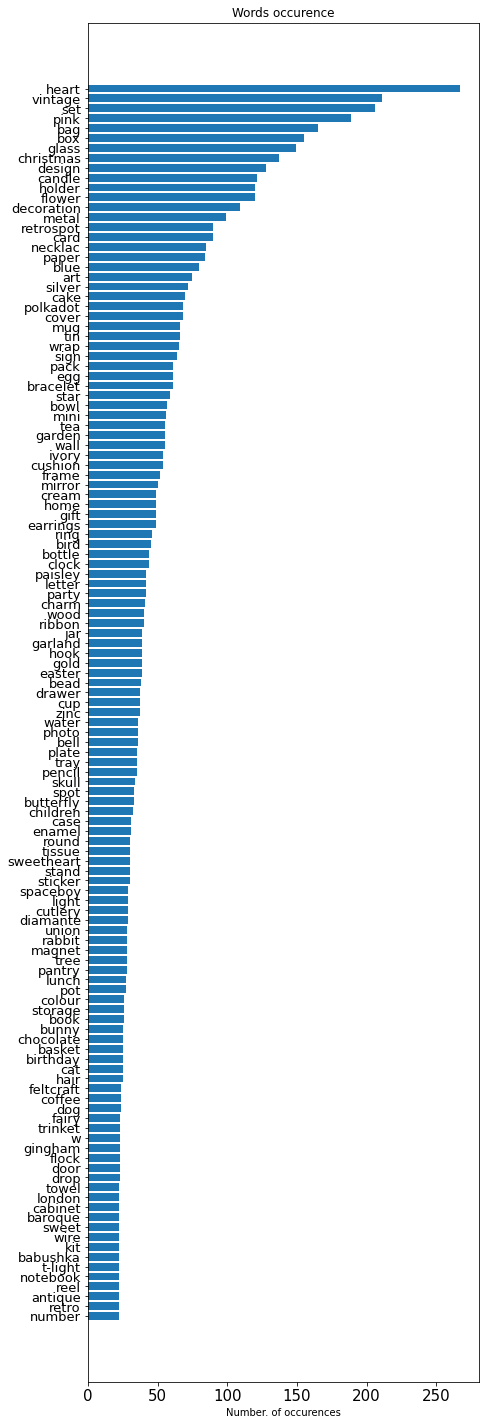

In [ ]:
#no14 - no need

#and then we proceed with the frequency of the characters
#we use matplotlib to view the frequency

list_products = []
for k,v in count_keywords.items():
    list_products.append([keywords_select[k],v])
list_products.sort(key = lambda x:x[1], reverse = True)

print_list = sorted(list_products, key = lambda x:x[1], reverse = True)

plt.rc('font', weight='normal')
fig, ax = plt.subplots(figsize=(7, 25))
y_axis = [i[1] for i in print_list[:125]]
x_axis = [k for k,i in enumerate(print_list[:125])]
x_label = [i[0] for i in print_list[:125]]
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 13)
plt.yticks(x_axis, x_label)
plt.xlabel("Number. of occurences")
ax.barh(x_axis, y_axis, align = 'center')
ax = plt.gca()
ax.invert_yaxis()

plt.title("Words occurence")
plt.show()

In [ ]:
#no15 - execute

#some words are not used
#so based on the graph we consider only words that have occured atleast 15 times

list_products = []
for k,v in count_keywords.items():
    word = keywords_select[k]
    if word in ['pink', 'blue', 'tag', 'green', 'orange']: continue
    if len(word) < 3 or v < 15: continue
    if ('+' in word) or ('/' in word): continue
    list_products.append([word, v])
list_products.sort(key = lambda x:x[1], reverse = True)

print('Initial no. of words:',len(count_keywords))
print('Words retained after:', len(list_products))

Initial no. of words: 1483
Words retained after: 168


In [ ]:
#no16 - execute

#we must encode the data here for further processing
#so we must equally distribute the data present here

product_list = clean_data['Description'].unique()
print( product_list )
X = pd.DataFrame()
for key, occurence in list_products:
    X.loc[:, key] = list(map(lambda x:int(key.upper() in x), product_list))

# print( X )
threshold = [0, 1, 2, 3, 5, 10]
label_col = []
for i in range(len(threshold)):
    if i == len(threshold)-1:
        col = '.>{}'.format(threshold[i])
    else:
        col = '{}<.<{}'.format(threshold[i],threshold[i+1])
    label_col.append(col)
    X.loc[:, col] = 0
# print( X )

for i, prod in enumerate(product_list):
    prix = clean_data[clean_data['Description'] == prod]['UnitPrice'].mean()
    j = 0
    while prix > threshold[j]:
        j+=1
        if j == len(threshold): break
    X.loc[i, label_col[j-1]] = 1
# print( X )

['WHITE HANGING HEART T-LIGHT HOLDER' 'WHITE METAL LANTERN'
 'CREAM CUPID HEARTS COAT HANGER' ... 'PINK CRYSTAL SKULL PHONE CHARM'
 'CREAM HANGING HEART T-LIGHT HOLDER' 'PAPER CRAFT , LITTLE BIRDIE']


In [ ]:
#no17 - no need

#here we find the number of product in each given range
#we must split the ranges so that the distrbtn is equal

print("{:<8} {:<20} \n".format('Range', 'No. products') + 20*'-')
s=0
for i in range(len(threshold)):
    if i == len(threshold)-1:
        col = '.>{}'.format(threshold[i])
    else:
        col = '{}<.<{}'.format(threshold[i],threshold[i+1])    
    print("{:<10}  {:<20}".format(col, X.loc[:, col].sum()))
    s+=X.loc[:, col].sum() 

print("Average:",s/len(threshold))

Range    No. products         
--------------------
0<.<1       964                 
1<.<2       1009                
2<.<3       673                 
3<.<5       608                 
5<.<10      468                 
.>10        156                 
Average: 646.3333333333334


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import numpy as np

In [ ]:
#no18 - no need

#we then use KMeans to perform clusters
#the clusters sai to perform well when close to no. 1
#also the number of clusters must be not so high here 

matrix = X.to_numpy()
for n_clusters in range(3,10):
    kmeans = KMeans(init='k-means++', n_clusters = n_clusters, n_init=30)
    kmeans.fit(matrix)
    clusters = kmeans.predict(matrix)
    silhouette_avg = silhouette_score(matrix, clusters)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

For n_clusters = 3 The average silhouette_score is : 0.10485118650272408
For n_clusters = 4 The average silhouette_score is : 0.13583699117517928
For n_clusters = 5 The average silhouette_score is : 0.155407877940655
For n_clusters = 6 The average silhouette_score is : 0.15467866534205643
For n_clusters = 7 The average silhouette_score is : 0.16735984918423577
For n_clusters = 8 The average silhouette_score is : 0.1439465668095459
For n_clusters = 9 The average silhouette_score is : 0.16001924761572026


In [ ]:
#no19 - execute

# clustering according to product
#we check the average cluster score

n_clusters = 5
silhouette_avg = -1
while silhouette_avg < 0.145:
    kmeans = KMeans(init='k-means++', n_clusters = n_clusters, n_init=30)
    kmeans.fit(matrix)
    clusters = kmeans.predict(matrix)
    silhouette_avg = silhouette_score(matrix, clusters)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

For n_clusters = 5 The average silhouette_score is : 0.15660799482901686


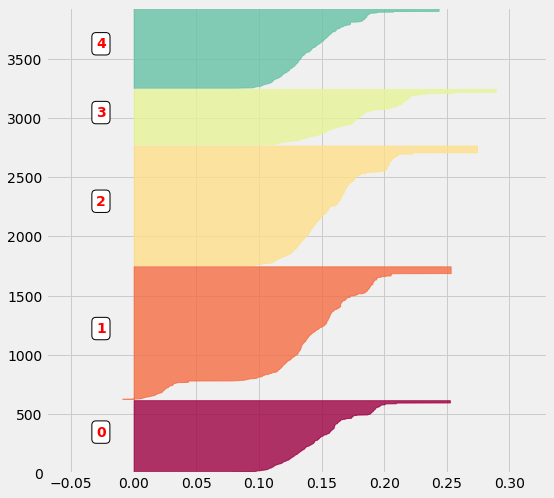

In [ ]:
#no20 - no need

#Representation of the silhouette scores of each element of the different clusters

def graph_component_silhouette(n_clusters, lim_x, mat_size, sample_silhouette_values, clusters):
    plt.rcParams["patch.force_edgecolor"] = True
    plt.style.use('fivethirtyeight')
    plt.rc('patch', edgecolor = 'dimgray', linewidth=1)

    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(8, 8)
    ax1.set_xlim([lim_x[0], lim_x[1]])
    ax1.set_ylim([0, mat_size + (n_clusters + 1) * 10])
    y_lower = 10
    for i in range(n_clusters):
        
        ith_cluster_silhouette_values = sample_silhouette_values[clusters == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        cmap = cm.get_cmap("Spectral")
        color = cmap(float(i) / n_clusters)        
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values,
                           facecolor=color, edgecolor=color, alpha=0.8)
        
        ax1.text(-0.03, y_lower + 0.5 * size_cluster_i, str(i), color = 'red', fontweight = 'bold',
                bbox=dict(facecolor='white', edgecolor='black', boxstyle='round, pad=0.3'))

        y_lower = y_upper + 10  

pd.Series(clusters).value_counts()

#we also perform cluster visualisation
#this is to get an insight of classification

sample_silhouette_values = silhouette_samples(matrix, clusters)

graph_component_silhouette(n_clusters, [-0.07, 0.33], len(X), sample_silhouette_values, clusters)

In [ ]:
#no21 - execute

#we create customer catogories here

# defining cluster of each product
# and storing it in categ_product
corresp = dict()
for key, val in zip (product_list, clusters):
    corresp[key] = val 
clean_data['categ_product'] = clean_data.loc[:, 'Description'].map(corresp)

# calculate the amount spent in each product category 
for i in range(5):
    col = 'categ_{}'.format(i)
    df_temp = clean_data[clean_data['categ_product'] == i]
    price_temp = df_temp['UnitPrice'] * (df_temp['Quantity'] - df_temp['QuantityCanceled'])
    price_temp = price_temp.apply(lambda x:x if x > 0 else 0)
    clean_data.loc[:, col] = price_temp
    clean_data[col].fillna(0, inplace = True)

clean_data[['InvoiceNo', 'Description', 'categ_product', 'categ_0', 'categ_1', 'categ_2', 'categ_3','categ_4']][:5]

,InvoiceNo,Description,categ_product,categ_0,categ_1,categ_2,categ_3,categ_4
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,2,0.0,0.0,15.3,0.0,0.00
1,536365,WHITE METAL LANTERN,4,0.0,0.0,0.0,0.0,20.34
2,536365,CREAM CUPID HEARTS COAT HANGER,4,0.0,0.0,0.0,0.0,22.00
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,4,0.0,0.0,0.0,0.0,20.34
4,536365,RED WOOLLY HOTTIE WHITE HEART.,4,0.0,0.0,0.0,0.0,20.34


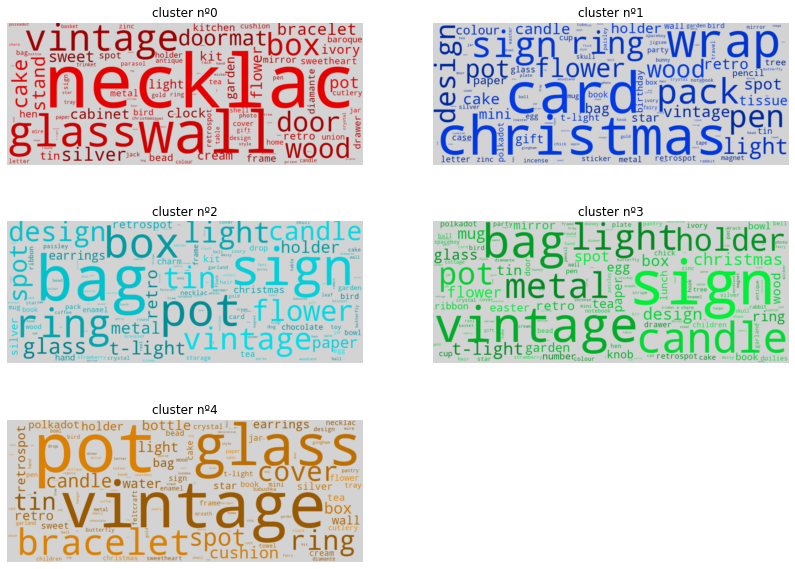

In [ ]:
#code11

from wordcloud import WordCloud
lists = pd.DataFrame(product_list)
list_words = [word for (word, occurence) in list_products]

occurence = [dict() for _ in range(n_clusters)]

for i in range(n_clusters):
    list_cluster = lists.loc[clusters == i]
    for word in list_words:
        if word in ['art', 'set', 'heart', 'pink', 'blue', 'tag']: continue
        occurence[i][word] = sum(list_cluster.loc[:, 0].str.contains(word.upper()))

def random_color_func(word=None, font_size=None, position=None,
                      orientation=None, font_path=None, random_state=None):
    h = int(360.0 * tone / 255.0)
    s = int(100.0 * 255.0 / 255.0)
    l = int(100.0 * float(random_state.randint(70, 120)) / 255.0)
    return "hsl({}, {}%, {}%)".format(h, s, l)
    
def make_wordcloud(liste, increment):
    ax1 = fig.add_subplot(4,2,increment)
    words = dict()
    trunc_occurences = liste[0:150]
    for s in trunc_occurences:
        words[s[0]] = s[1]
    wordcloud = WordCloud(width=1000,height=400, background_color='lightgrey', 
                          max_words=1628,relative_scaling=1,
                          color_func = random_color_func,
                          normalize_plurals=False)
    wordcloud.generate_from_frequencies(words)
    ax1.imshow(wordcloud, interpolation="bilinear")
    ax1.axis('off')
    plt.title('cluster nº{}'.format(increment-1))

fig = plt.figure(1, figsize=(14,14))
color = [0, 160, 130, 95, 280, 40, 330, 110, 25]
for i in range(n_clusters):
    list_cluster_occurences = occurence[i]

    tone = color[i] # define the color of the words
    lists = []
    for key, value in list_cluster_occurences.items():
        lists.append([key, value])
    lists.sort(key = lambda x:x[1], reverse = True)
    make_wordcloud(lists, i+1)      

In [ ]:
#no22

clean_data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
# the total price of every purchase
clean_data['TotalPrice'] = clean_data['UnitPrice'] * (clean_data['Quantity'] - clean_data['QuantityCanceled'])

# grouping of different products ordered belonging to same purchase 
# sum of purchases(i.e., calculate total price of all products in a basket) per user & order
temp = clean_data.groupby(by=['CustomerID', 'InvoiceNo'], as_index=False)['TotalPrice'].sum()
basket_price = temp.rename(columns = {'TotalPrice':'Basket Price'})

# Sum of the price per product category for each order
for i in range(5):
    col = 'categ_{}'.format(i)
    temp = clean_data.groupby(by=['CustomerID', 'InvoiceNo'], as_index=False)[col].sum()
    basket_price.loc[:, col] = temp 


# date of order
clean_data['InvoiceDate_int'] = clean_data['InvoiceDate'].astype('int64')
temp = clean_data.groupby(by=['CustomerID', 'InvoiceNo'], as_index=False)['InvoiceDate_int'].mean()
clean_data.drop('InvoiceDate_int', axis = 1, inplace = True)
basket_price.loc[:, 'InvoiceDate'] = pd.to_datetime(temp['InvoiceDate_int'])

# selection of significant entries
basket_price = basket_price[basket_price['Basket Price'] > 0]
basket_price.sort_values('CustomerID', ascending = True)[:5]

,CustomerID,InvoiceNo,Basket Price,categ_0,categ_1,categ_2,categ_3,categ_4,InvoiceDate
1,12347.0,537626,711.79,293.35,23.40,187.2,124.44,83.40,2010-12-07 14:57:00.000001024
2,12347.0,542237,475.39,169.20,122.59,130.5,0.00,53.10,2011-01-26 14:29:59.999999744
3,12347.0,549222,636.25,115.00,119.25,330.9,0.00,71.10,2011-04-07 10:42:59.999999232
4,12347.0,556201,382.52,168.76,41.40,74.4,19.90,78.06,2011-06-09 13:01:00.000000256
5,12347.0,562032,584.91,158.16,99.55,109.7,97.80,119.70,2011-08-02 08:48:00.000000000


In [ ]:
print(clean_data.columns)

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'QuantityCanceled',
       'categ_product', 'categ_0', 'categ_1', 'categ_2', 'categ_3', 'categ_4',
       'TotalPrice'],
      dtype='object')


In [ ]:
#no23

#categories based on transactions
# number of visits and stats on the basket amount / users
transactions_per_user=basket_price.groupby(by=['CustomerID'])['Basket Price'].agg(['count','min','max','mean','sum'])

# Sum of the price per product category for all orders of each customer
for i in range(5):
    col = 'categ_{}'.format(i)
    transactions_per_user.loc[:,col] = basket_price.groupby(by=['CustomerID'])[col].sum() /\
                                            transactions_per_user['sum']*100

transactions_per_user.reset_index(drop = False, inplace = True)
print(transactions_per_user.sort_values('CustomerID', ascending = True).head(5))

# number of days elapsed since the first and last purchase 
last_date = basket_price['InvoiceDate'].max().date()

first_registration = pd.DataFrame(basket_price.groupby(by=['CustomerID'])['InvoiceDate'].min())
last_purchase      = pd.DataFrame(basket_price.groupby(by=['CustomerID'])['InvoiceDate'].max())

test  = first_registration.applymap(lambda x:(last_date - x.date()).days)
test2 = last_purchase.applymap(lambda x:(last_date - x.date()).days)

transactions_per_user.loc[:, 'LastPurchase'] = test2.reset_index(drop = False)['InvoiceDate']
transactions_per_user.loc[:, 'FirstPurchase'] = test.reset_index(drop = False)['InvoiceDate']

transactions_per_user[:5]

   CustomerID  count      min  ...    categ_2    categ_3    categ_4
0     12347.0      7   224.82  ...  26.375870   7.604176  20.805104
1     12348.0      4   227.44  ...  41.953217   0.000000   0.000000
2     12349.0      1  1757.55  ...  26.506216  20.389178  12.245455
3     12350.0      1   334.40  ...  48.444976   0.000000  27.900718
4     12352.0      7   144.35  ...  15.705178  14.691643   4.071325

[5 rows x 11 columns]


,CustomerID,count,min,max,mean,sum,categ_0,categ_1,categ_2,categ_3,categ_4,LastPurchase,FirstPurchase
0,12347.0,7,224.82,1294.32,615.714286,4310.00,29.540371,15.674478,26.375870,7.604176,20.805104,2,367
1,12348.0,4,227.44,892.80,449.310000,1797.24,0.000000,58.046783,41.953217,0.000000,0.000000,75,358
2,12349.0,1,1757.55,1757.55,1757.550000,1757.55,10.713778,30.145373,26.506216,20.389178,12.245455,18,18
3,12350.0,1,334.40,334.40,334.400000,334.40,0.000000,23.654306,48.444976,0.000000,27.900718,310,310
4,12352.0,7,144.35,840.30,340.815714,2385.71,14.601523,50.930331,15.705178,14.691643,4.071325,36,296


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
#no24

#we perform standardisation here

list_cols = ['count','min','max','mean','categ_0','categ_1','categ_2','categ_3','categ_4']
selected_customers = transactions_per_user.copy(deep = True)
matrix = selected_customers[list_cols].to_numpy()

scaler = StandardScaler()
scaler.fit(matrix)
print('variables mean values: \n' + 90*'-' + '\n' , scaler.mean_)
scaled_matrix = scaler.transform(matrix)

variables mean values: 
------------------------------------------------------------------------------------------
 [  4.25461681 242.89864081 581.28878855 374.29997106  16.99101699
  21.3112099   25.30812857  14.79626011  21.60322663]


In [ ]:
# analysing the best value of n_clusters for customer based classification

for n_clusters in range(8,16):
    kmeans = KMeans(init='k-means++', n_clusters = n_clusters, n_init=30)
    kmeans.fit(scaled_matrix)
    clusters = kmeans.predict(scaled_matrix)
    silhouette_avg = silhouette_score(scaled_matrix, clusters)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

NameError: ignored

In [ ]:
#no25

# clustering according to customers
# best score when clusters are 11
n_clusters = 11
kmeans = KMeans(init='k-means++', n_clusters = n_clusters, n_init=100)
kmeans.fit(scaled_matrix)
clusters_clients = kmeans.predict(scaled_matrix)
silhouette_avg = silhouette_score(scaled_matrix, clusters_clients)
print('Silhouette score: {:<.3f}'.format(silhouette_avg))

selected_customers.loc[:, 'cluster'] = clusters_clients

cluster_insights = pd.DataFrame()
for i in range(n_clusters):
    test = pd.DataFrame(selected_customers[selected_customers['cluster'] == i].mean())
    test = test.T.set_index('cluster', drop = True)
    test['no_of_cust'] = selected_customers[selected_customers['cluster'] == i].shape[0]
    cluster_insights = pd.concat([cluster_insights, test])

cluster_insights.drop('CustomerID', axis = 1, inplace = True)
print('No. of customers:', cluster_insights['no_of_cust'].sum())

cluster_insights = cluster_insights.sort_values('sum')

Silhouette score: 0.217
No. of customers: 4332


In [ ]:
list_index = []
for i in range(5):
    column = 'categ_{}'.format(i)
    list_index.append(cluster_insights[cluster_insights[column] > 45].index.values[0])
#___________________________________
list_index_reordered = list_index
list_index_reordered += [ s for s in cluster_insights.index if s not in list_index]
#___________________________________________________________
cluster_insights = cluster_insights.reindex(index = list_index_reordered)
cluster_insights = cluster_insights.reset_index(drop = False)
display(cluster_insights[['cluster', 'count', 'min', 'max', 'mean', 'sum', 'categ_0', 'categ_1', 'categ_2', 'categ_3', 'categ_4', 'no_of_cust']])

,cluster,count,min,max,mean,sum,categ_0,categ_1,categ_2,categ_3,categ_4,no_of_cust
0,1.0,2.659091,196.610000,359.141039,268.489438,868.128377,53.483166,10.082581,13.546422,9.643754,13.272699,308
1,8.0,2.244344,202.683756,324.549118,254.276706,614.230068,7.217793,59.157215,15.713078,7.798556,10.113358,442
2,5.0,2.708402,209.306491,349.812125,273.946331,764.207003,8.658345,17.211983,54.662407,5.396193,14.074107,607
3,0.0,2.964286,191.813516,339.940879,260.172916,802.035742,12.584735,12.135094,11.371880,51.802610,12.109181,364
4,9.0,2.996678,199.012558,409.136645,297.641460,985.564884,7.244264,9.807209,13.439150,5.729092,63.812000,301
5,6.0,3.700000,206.911498,495.536239,336.244626,1271.505985,18.214649,19.579675,24.827657,14.616920,22.766518,1890
6,2.0,2.139037,1018.431390,1540.308027,1260.376228,2981.612786,18.747464,20.389695,26.100811,13.598027,21.165116,187
7,4.0,1.500000,4075.741667,6245.503333,5073.737778,7931.028333,15.135140,29.221945,18.218655,12.841314,24.582946,12
8,10.0,21.050505,67.706263,1314.654040,468.718991,9773.903737,17.231038,18.581258,23.426599,15.799243,24.985083,198
9,7.0,127.714286,11.791429,2235.722857,384.648387,50256.434286,14.298334,21.223645,25.254927,17.089091,22.134206,7


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import sklearn.metrics as metrics

In [ ]:
#no26

#defining Class fit

class Class_Fit(object):
    def __init__(self, clf, params=None):
        if params:            
            self.clf = clf(**params)
        else:
            self.clf = clf()

    def train(self, x_train, y_train):
        self.clf.fit(x_train, y_train)

    def predict(self, x):
        return self.clf.predict(x)
    
    def grid_search(self, parameters, Kfold):
        self.grid = GridSearchCV(estimator = self.clf, param_grid = parameters, cv = Kfold)
        
    def grid_fit(self, X, Y):
        self.grid.fit(X, Y)
        print(self.grid.best_params_)

    def grid_predict(self, X, Y):
        self.predictions = self.grid.predict(X)
        print("Precision: {:.2f} % ".format(100*metrics.accuracy_score(Y, self.predictions)))

    def get_predict(self, X):
        self.predictions = self.grid.predict(X)
        return self.predictions

In [ ]:
#no27

#here we apply various models

columns = ['mean', 'categ_0', 'categ_1', 'categ_2', 'categ_3', 'categ_4' ]
X = selected_customers[columns]
Y = selected_customers['cluster']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.67)

#random regression model

rf = Class_Fit(clf = RandomForestClassifier)
param_grid = {'criterion' : ['entropy', 'gini'], 'n_estimators' : [50,100,200],
               'max_features' :['sqrt', 'log2']}
rf.grid_search(parameters = param_grid, Kfold = 5)
rf.grid_fit(X = X_train, Y = Y_train)
rf.grid_predict(X_test, Y_test)


input_customerID = 12350
individual_entry = selected_customers[selected_customers['CustomerID'] == input_customerID][['mean', 'categ_0', 'categ_1', 'categ_2', 'categ_3', 'categ_4' ]]
print(individual_entry)
resulted_cluster = rf.get_predict(individual_entry)
print(resulted_cluster)
print(selected_customers[selected_customers['CustomerID'] == input_customerID]['cluster'])
# selected_customer-selected_customers.drop("CustomerID",axis=1)

col=[]
for i in selected_customers: 
  if i!="CustomerID": col.append(i)

cluster_list = selected_customers['cluster'].unique()
type( cluster_list )
print( cluster_list )
for i in cluster_list:
    print(selected_customers[selected_customers['cluster'] == i][col].mean())
    temp_final_df = selected_customers.reset_index()
    cust = list(temp_final_df[temp_final_df['cluster'] == i]['CustomerID'])
    cluster = clean_data[clean_data['CustomerID'].isin(cust)]
    print(cluster[['Quantity', 'UnitPrice', 'QuantityCanceled', 'TotalPrice']].mean())
    print(cluster['Description'].value_counts()[:10])
#the end

{'criterion': 'gini', 'max_features': 'sqrt', 'n_estimators': 100}
Precision: 91.54 % 
    mean  categ_0    categ_1    categ_2  categ_3    categ_4
3  334.4      0.0  23.654306  48.444976      0.0  27.900718
[5]
3    5
Name: cluster, dtype: int32
[ 6  8  2  5  4  0  9  1  3 10  7]
count               3.700000
min               206.911498
max               495.536239
mean              336.244626
sum              1271.505985
categ_0            18.214649
categ_1            19.579675
categ_2            24.827657
categ_3            14.616920
categ_4            22.766518
LastPurchase       75.968254
FirstPurchase     227.649206
cluster             6.000000
dtype: float64
Quantity             7.689612
UnitPrice            2.888845
QuantityCanceled     0.079747
TotalPrice          12.940843
dtype: float64
WHITE HANGING HEART T-LIGHT HOLDER    1017
REGENCY CAKESTAND 3 TIER               741
ASSORTED COLOUR BIRD ORNAMENT          709
PARTY BUNTING                          635
JUMBO BAG RED RETROS

In [ ]:
#no28

#task1 - cluster wise cust
#cluster wise freq
dummy=sorted(selected_customers['cluster'].unique())
d={}

#logic to unique customer cluster wise
for i in dummy: d[i]=0 
for i in selected_customers['cluster']: d[i]+=1 
print(d)

#same logic diff code
s=0
for i in dummy:
  x=[]
  for j in selected_customers.index: 
    if selected_customers["cluster"][j]==i: 
      x.append(selected_customers["CustomerID"][j])
  #cluster wise data
  print("No. of unique customers in cluster{}: {}".format(i,len(set(x))))
  s+=len(set(x)) #variable used to add all unique ID

#cross verification
print(len(selected_customers["CustomerID"].unique()))
print(s)
print()

#task2 - number of orders
print(len(clean_data["Country"].unique()))
unicount=clean_data["Country"].unique()
print(clean_data.columns)

d={}
for i in unicount: d[i]=0 
for i in clean_data['Country']: d[i]+=1 
d=dict(sorted(d.items(), key=lambda x: x[1])[::-1])

print("Country wise customer data in desc order:")
print()
for i in d.keys():  print("{:<20} {:<10}".format(i,d[i]))


{0: 364, 1: 308, 2: 187, 3: 16, 4: 12, 5: 607, 6: 1890, 7: 7, 8: 442, 9: 301, 10: 198}
No. of unique customers in cluster0: 364
No. of unique customers in cluster1: 308
No. of unique customers in cluster2: 187
No. of unique customers in cluster3: 16
No. of unique customers in cluster4: 12
No. of unique customers in cluster5: 607
No. of unique customers in cluster6: 1890
No. of unique customers in cluster7: 7
No. of unique customers in cluster8: 442
No. of unique customers in cluster9: 301
No. of unique customers in cluster10: 198
4332
4332

37
Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'QuantityCanceled',
       'categ_product', 'categ_0', 'categ_1', 'categ_2', 'categ_3', 'categ_4',
       'TotalPrice'],
      dtype='object')
Country wise customer data in desc order:

United Kingdom       354458    
Germany              9042      
France               8345      
EIRE                 7241      
Spain           

In [ ]:
#no27-part2

print(clean_data.columns)
print(selected_customers.columns)
clean_data["cluster"]=selected_customers["cluster"]

dummy=sorted(selected_customers['cluster'].unique())
d={}

for i in dummy:
  x,y=[],[]
  for j in clean_data.index: 
    if clean_data["cluster"][j]==i: 
      x.append(clean_data["Quantity"][j])
      y.append(clean_data["QuantityCanceled"][j])
  #cluster wise data
  #quantites
  print("No. qts in cluster{}: {}".format(i+1,len((x))))
  #quantities cancelled
  print("No. qtc in cluster{}: {}".format(i+1,len((y))))
  #ratio
  print("Ratio in cluser{}: {}".format(i+1,(len((y))/len((x)))*100))

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'QuantityCanceled',
       'categ_product', 'categ_0', 'categ_1', 'categ_2', 'categ_3', 'categ_4',
       'TotalPrice', 'cluster'],
      dtype='object')
Index(['CustomerID', 'count', 'min', 'max', 'mean', 'sum', 'categ_0',
       'categ_1', 'categ_2', 'categ_3', 'categ_4', 'LastPurchase',
       'FirstPurchase', 'cluster'],
      dtype='object')
No. qts in cluster1: 271
No. qtc in cluster1: 271
Ratio in cluser1: 100.0
No. qts in cluster2: 224
No. qtc in cluster2: 224
Ratio in cluser2: 100.0
No. qts in cluster3: 144
No. qtc in cluster3: 144
Ratio in cluser3: 100.0
No. qts in cluster4: 12
No. qtc in cluster4: 12
Ratio in cluser4: 100.0
No. qts in cluster5: 10
No. qtc in cluster5: 10
Ratio in cluser5: 100.0
No. qts in cluster6: 436
No. qtc in cluster6: 436
Ratio in cluser6: 100.0
No. qts in cluster7: 1312
No. qtc in cluster7: 1312
Ratio in cluser7: 100.0
No. qts in clus

In [ ]:
print(clean_data.sumna())

AttributeError: ignored

In [ ]:
#no28

#rfm classification

custom_aggregation = {}
custom_aggregation["InvoiceDate"] = lambda x:x.iloc[0]
custom_aggregation["CustomerID"] = lambda x:x.iloc[0]
custom_aggregation["TotalPrice"] = "sum"

rfmTable = clean_data.groupby("InvoiceNo").agg(custom_aggregation)

In [ ]:
#no29

import datetime as dt
NOW = dt.datetime(2011,12,10)

rfmTable["Recency"] = NOW - rfmTable["InvoiceDate"]
rfmTable["Recency"] = pd.to_timedelta(rfmTable["Recency"]).astype("timedelta64[D]")

custom_aggregation = {}

custom_aggregation["Recency"] = ["min", "max"]
custom_aggregation["InvoiceDate"] = lambda x: len(x)
custom_aggregation["TotalPrice"] = "sum"

rfmTable_final = rfmTable.groupby("CustomerID").agg(custom_aggregation)

rfmTable_final.columns = ["min_recency", "max_recency", "frequency", "monetary_value"]

rfmTable_final.head(5)

,min_recency,max_recency,frequency,monetary_value
CustomerID,,,,
12346.0,325.0,325.0,1,0.00
12347.0,2.0,367.0,7,4310.00
12348.0,75.0,358.0,4,1797.24
12349.0,18.0,18.0,1,1757.55
12350.0,310.0,310.0,1,334.40


In [ ]:
#no30

first_customer = clean_data[clean_data['CustomerID']=='12747']
first_customer.head(5)

quantiles = rfmTable_final.quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()

segmented_rfm = rfmTable_final

def RScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
def FMScore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

/usr/local/lib/python3.6/dist-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [ ]:
#no31

segmented_rfm['r_quartile'] = segmented_rfm['min_recency'].apply(RScore, args=('min_recency',quantiles,))
segmented_rfm['f_quartile'] = segmented_rfm['frequency'].apply(FMScore, args=('frequency',quantiles,))
segmented_rfm['m_quartile'] = segmented_rfm['monetary_value'].apply(FMScore, args=('monetary_value',quantiles,))
segmented_rfm.head()
segmented_rfm['RFMScore'] = segmented_rfm.r_quartile.map(str) + segmented_rfm.f_quartile.map(str) + segmented_rfm.m_quartile.map(str)
segmented_rfm.head()

segmented_rfm[segmented_rfm['RFMScore']=='111'].sort_values('monetary_value', ascending=False)
segmented_rfm.head(5)
segmented_rfm = segmented_rfm.reset_index()
segmented_rfm.head(5)

ValueError: ignored

In [ ]:
#no32

clean_data = pd.merge(clean_data,segmented_rfm, on='CustomerID')
print(clean_data.columns)
# clean_data = clean_data.drop(columns=['r_quartile', 'f_quartile', 'm_quartile'])

clean_data['Month'] = clean_data["InvoiceDate"].map(lambda x: x.month)
clean_data['Month'].value_counts()
clean_data['Weekday'] = clean_data["InvoiceDate"].map(lambda x: x.weekday())
clean_data['Day'] = clean_data["InvoiceDate"].map(lambda x: x.day)
clean_data['Hour'] = clean_data["InvoiceDate"].map(lambda x: x.hour)
clean_data.head(5)

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'QuantityCanceled',
       'categ_product', 'categ_0', 'categ_1', 'categ_2', 'categ_3', 'categ_4',
       'TotalPrice', 'level_0_x', 'index_x', 'min_recency_x', 'max_recency_x',
       'frequency_x', 'monetary_value_x', 'r_quartile_x', 'f_quartile_x',
       'm_quartile_x', 'RFMScore_x', 'level_0_y', 'index_y', 'min_recency_y',
       'max_recency_y', 'frequency_y', 'monetary_value_y', 'r_quartile_y',
       'f_quartile_y', 'm_quartile_y', 'RFMScore_y', 'level_0_x', 'index_x',
       'min_recency_x', 'max_recency_x', 'frequency_x', 'monetary_value_x',
       'r_quartile_x', 'f_quartile_x', 'm_quartile_x', 'RFMScore_x',
       'level_0_y', 'index_y', 'min_recency_y', 'max_recency_y', 'frequency_y',
       'monetary_value_y', 'r_quartile_y', 'f_quartile_y', 'm_quartile_y',
       'RFMScore_y'],
      dtype='object')


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,QuantityCanceled,categ_product,categ_0,categ_1,categ_2,categ_3,categ_4,TotalPrice,level_0_x,index_x,min_recency_x,max_recency_x,frequency_x,monetary_value_x,r_quartile_x,f_quartile_x,m_quartile_x,RFMScore_x,level_0_y,index_y,min_recency_y,max_recency_y,frequency_y,monetary_value_y,r_quartile_y,f_quartile_y,m_quartile_y,RFMScore_y,level_0_x,index_x,min_recency_x,max_recency_x,frequency_x,monetary_value_x,r_quartile_x,f_quartile_x,m_quartile_x,RFMScore_x,level_0_y,index_y,min_recency_y,max_recency_y,frequency_y,monetary_value_y,r_quartile_y,f_quartile_y,m_quartile_y,RFMScore_y,Month,Weekday,Day,Hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,0,11,0.0,0.0,0.0,0.0,0.0,15.30,4017,4017,372.0,373.0,34,5327.79,4,1,1,411,4017,4017,372.0,373.0,34,5327.79,4,1,1,411,4017,4017,372.0,373.0,34,5327.79,4,1,1,411,4017,4017,372.0,373.0,34,5327.79,4,1,1,411,12,2,1,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0,9,0.0,0.0,0.0,0.0,0.0,20.34,4017,4017,372.0,373.0,34,5327.79,4,1,1,411,4017,4017,372.0,373.0,34,5327.79,4,1,1,411,4017,4017,372.0,373.0,34,5327.79,4,1,1,411,4017,4017,372.0,373.0,34,5327.79,4,1,1,411,12,2,1,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,0,11,0.0,0.0,0.0,0.0,0.0,22.00,4017,4017,372.0,373.0,34,5327.79,4,1,1,411,4017,4017,372.0,373.0,34,5327.79,4,1,1,411,4017,4017,372.0,373.0,34,5327.79,4,1,1,411,4017,4017,372.0,373.0,34,5327.79,4,1,1,411,12,2,1,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0,12,0.0,0.0,0.0,0.0,0.0,20.34,4017,4017,372.0,373.0,34,5327.79,4,1,1,411,4017,4017,372.0,373.0,34,5327.79,4,1,1,411,4017,4017,372.0,373.0,34,5327.79,4,1,1,411,4017,4017,372.0,373.0,34,5327.79,4,1,1,411,12,2,1,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0,11,0.0,0.0,0.0,0.0,0.0,20.34,4017,4017,372.0,373.0,34,5327.79,4,1,1,411,4017,4017,372.0,373.0,34,5327.79,4,1,1,411,4017,4017,372.0,373.0,34,5327.79,4,1,1,411,4017,4017,372.0,373.0,34,5327.79,4,1,1,411,12,2,1,8


In [ ]:
 nltk.download('stopwords')
 from sklearn.feature_extraction.text import TfidfVectorizer
 from sklearn.decomposition import TruncatedSVD
 from sklearn.preprocessing import Normalizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


TF_IDF_matrix : (3878, 1698) of float64
TF_IDF_embedded : (3878, 100) of float64


Text(0.5, 1.0, 'ACP with 135 clusters')

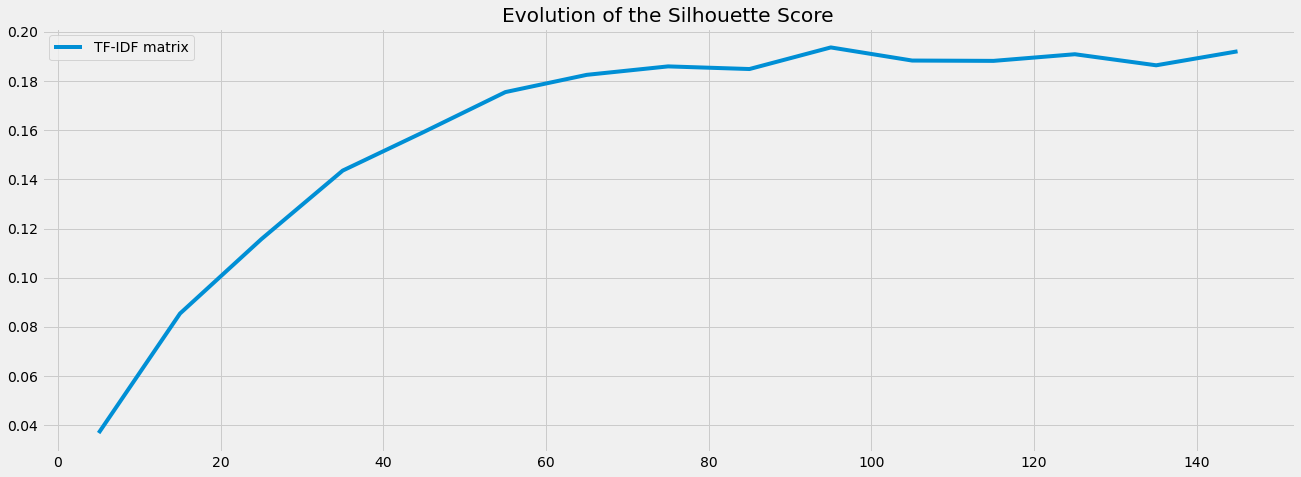

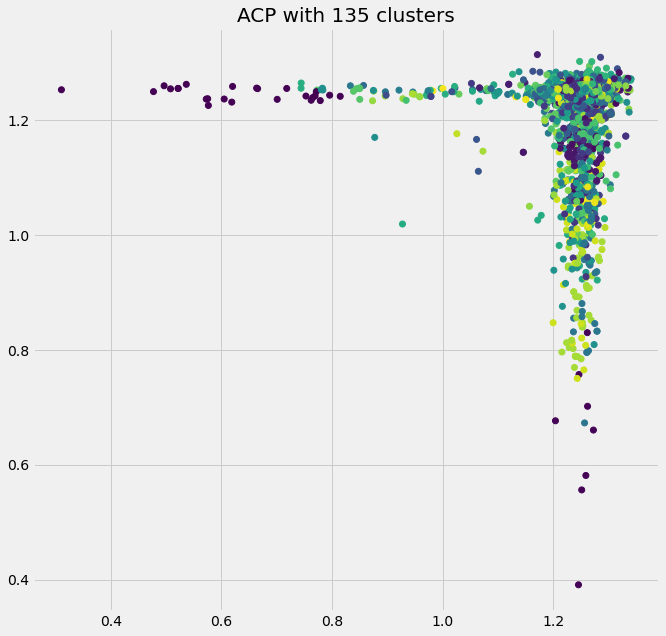

In [ ]:
#no33


X = clean_data["Description"].unique()

stemmer = nltk.stem.porter.PorterStemmer()
stopword = nltk.corpus.stopwords.words('english')

def stem_and_filter(doc):
    tokens = [stemmer.stem(w) for w in analyzer(doc)]
    return [token for token in tokens if token.isalpha()]

analyzer = TfidfVectorizer().build_analyzer()
CV = TfidfVectorizer(lowercase=True, stop_words="english", analyzer=stem_and_filter, min_df=0.00, max_df=0.3)  # we remove words if it appears in more than 30 % of the corpus (not found stopwords like Box, Christmas and so on)
TF_IDF_matrix = CV.fit_transform(X)
print("TF_IDF_matrix :", TF_IDF_matrix.shape, "of", TF_IDF_matrix.dtype)

svd = TruncatedSVD(n_components = 100)
normalizer = Normalizer(copy=False)

TF_IDF_embedded = svd.fit_transform(TF_IDF_matrix)
TF_IDF_embedded = normalizer.fit_transform(TF_IDF_embedded)
print("TF_IDF_embedded :", TF_IDF_embedded.shape, "of", TF_IDF_embedded.dtype)

score_tfidf = []

x = list(range(5, 155, 10))

for n_clusters in x:
    kmeans = KMeans(init='k-means++', n_clusters = n_clusters, n_init=10)
    kmeans.fit(TF_IDF_embedded)
    clusters = kmeans.predict(TF_IDF_embedded)
    silhouette_avg = silhouette_score(TF_IDF_embedded, clusters)

    rep = np.histogram(clusters, bins = n_clusters-1)[0]
    score_tfidf.append(silhouette_avg)

plt.figure(figsize=(20,16))

plt.subplot(2, 1, 1)
plt.plot(x, score_tfidf, label="TF-IDF matrix")
plt.title("Evolution of the Silhouette Score")
plt.legend()

n_clusters = 135

kmeans = KMeans(init='k-means++', n_clusters = n_clusters, n_init=30, random_state=0)
proj = kmeans.fit_transform(TF_IDF_embedded)
clusters = kmeans.predict(TF_IDF_embedded)
plt.figure(figsize=(10,10))
plt.scatter(proj[:,0], proj[:,1], c=clusters)
plt.title("ACP with 135 clusters", fontsize="20")

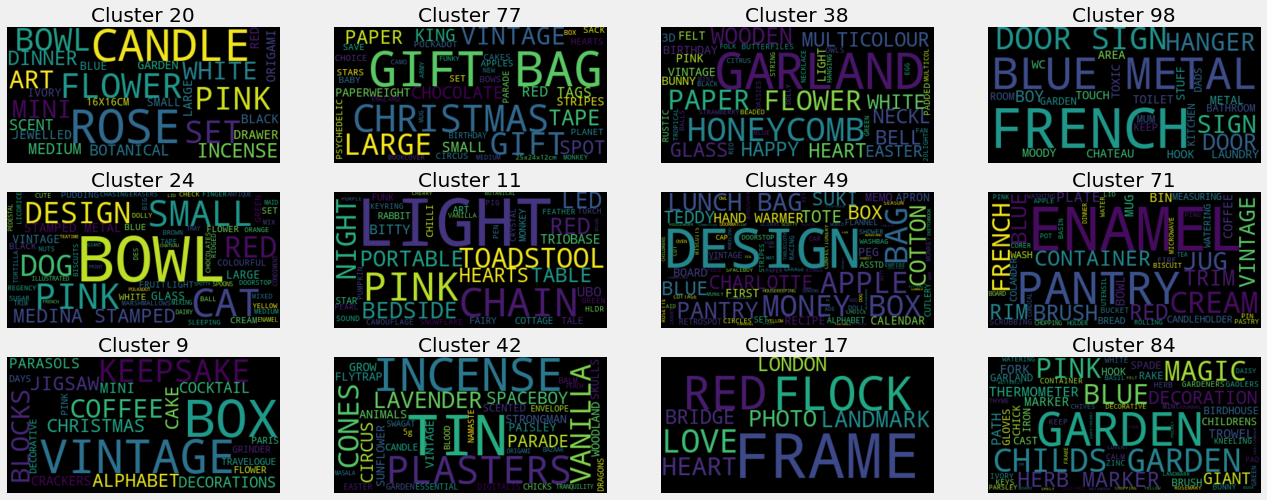

<Figure size 432x288 with 0 Axes>

In [ ]:
#no34
 
import random
from wordcloud import WordCloud
plt.figure(figsize=(20,8))
wc = WordCloud()

for num, cluster in enumerate(random.sample(range(100), 12)) :
    plt.subplot(3, 4, num+1)
    wc.generate(" ".join(X[np.where(clusters==cluster)]))
    plt.imshow(wc, interpolation='bilinear')
    plt.title("Cluster {}".format(cluster))
    plt.axis("off")
plt.figure()

dict_article_to_cluster = {article : cluster for article, cluster in zip(X, clusters)}

In [ ]:
#no35

# cluster = clean_data['Description'].apply(lambda x : dict_article_to_cluster[x])
# df2 = pd.get_dummies(cluster, prefix="Cluster").mul(clean_data["TotalPrice"], 0)
# df2 = pd.concat([clean_data['InvoiceNo'], df2], axis=1)
# df2_grouped = df2.groupby('InvoiceNo').sum()

# custom_aggregation = {}
# custom_aggregation["TotalPrice"] = lambda x:x.iloc[0]
# custom_aggregation["min_recency"] = lambda x:x.iloc[0]
# custom_aggregation["max_recency"] = lambda x:x.iloc[0]
# custom_aggregation["frequency"] = lambda x:x.iloc[0]
# custom_aggregation["monetary_value"] = lambda x:x.iloc[0]
# custom_aggregation["CustomerID"] = lambda x:x.iloc[0]
# custom_aggregation["Quantity"] = "sum"
# custom_aggregation["Country"] = lambda x:x.iloc[0]


# df_grouped = clean_data.groupby("InvoiceNo")

# df2_grouped_final = pd.concat([df_grouped['CustomerID'], df2_grouped], axis=1).set_index("CustomerID").groupby("CustomerID").sum()
# df2_grouped_final = df2_grouped_final.div(df2_grouped_final.sum(axis=1), axis=0)
# df2_grouped_final = df2_grouped_final.fillna(0)

# custom_aggregation = {}
# custom_aggregation["TotalPrice"] = ['min','max','mean']
# custom_aggregation["min_recency"] = lambda x:x.iloc[0]
# custom_aggregation["max_recency"] = lambda x:x.iloc[0]
# custom_aggregation["frequency"] = lambda x:x.iloc[0]
# custom_aggregation["monetary_value"] = lambda x:x.iloc[0]
# custom_aggregation["Quantity"] = "sum"
# custom_aggregation["Country"] = lambda x:x.iloc[0]

# df_grouped_final = df_grouped.groupby("CustomerID")
# df_grouped_final.head(5)

custom_aggregation = {}
custom_aggregation["TotalPrice"] = ['min','max','mean']
custom_aggregation["min_recency"] = lambda x:x.iloc[0]
custom_aggregation["max_recency"] = lambda x:x.iloc[0]
custom_aggregation["frequency"] = lambda x:x.iloc[0]
custom_aggregation["monetary_value"] = lambda x:x.iloc[0]
custom_aggregation["Quantity"] = "sum"
custom_aggregation["Country"] = lambda x:x.iloc[0]

# df_grouped_final = (df_grouped.groupby("CustomerID").unstack()).agg(custom_aggregation)
# df1 = df_grouped.set_index('CustomerID').stack()
df_grouped_final = df_grouped

df_grouped_final.head(5)





,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,QuantityCanceled,categ_product,categ_0,categ_1,categ_2,categ_3,categ_4,TotalPrice,level_0_x,index_x,min_recency_x,max_recency_x,frequency_x,monetary_value_x,r_quartile_x,f_quartile_x,m_quartile_x,RFMScore_x,level_0_y,index_y,min_recency_y,max_recency_y,frequency_y,monetary_value_y,r_quartile_y,f_quartile_y,m_quartile_y,RFMScore_y,level_0_x,index_x,min_recency_x,max_recency_x,frequency_x,monetary_value_x,r_quartile_x,f_quartile_x,m_quartile_x,RFMScore_x,level_0_y,index_y,min_recency_y,max_recency_y,frequency_y,monetary_value_y,r_quartile_y,f_quartile_y,m_quartile_y,RFMScore_y,Month,Weekday,Day,Hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,0,11,0.0,0.0,0.0,0.0,0.0,15.30,4017,4017,372.0,373.0,34,5327.79,4,1,1,411,4017,4017,372.0,373.0,34,5327.79,4,1,1,411,4017,4017,372.0,373.0,34,5327.79,4,1,1,411,4017,4017,372.0,373.0,34,5327.79,4,1,1,411,12,2,1,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0,9,0.0,0.0,0.0,0.0,0.0,20.34,4017,4017,372.0,373.0,34,5327.79,4,1,1,411,4017,4017,372.0,373.0,34,5327.79,4,1,1,411,4017,4017,372.0,373.0,34,5327.79,4,1,1,411,4017,4017,372.0,373.0,34,5327.79,4,1,1,411,12,2,1,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,0,11,0.0,0.0,0.0,0.0,0.0,22.00,4017,4017,372.0,373.0,34,5327.79,4,1,1,411,4017,4017,372.0,373.0,34,5327.79,4,1,1,411,4017,4017,372.0,373.0,34,5327.79,4,1,1,411,4017,4017,372.0,373.0,34,5327.79,4,1,1,411,12,2,1,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0,12,0.0,0.0,0.0,0.0,0.0,20.34,4017,4017,372.0,373.0,34,5327.79,4,1,1,411,4017,4017,372.0,373.0,34,5327.79,4,1,1,411,4017,4017,372.0,373.0,34,5327.79,4,1,1,411,4017,4017,372.0,373.0,34,5327.79,4,1,1,411,12,2,1,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0,11,0.0,0.0,0.0,0.0,0.0,20.34,4017,4017,372.0,373.0,34,5327.79,4,1,1,411,4017,4017,372.0,373.0,34,5327.79,4,1,1,411,4017,4017,372.0,373.0,34,5327.79,4,1,1,411,4017,4017,372.0,373.0,34,5327.79,4,1,1,411,12,2,1,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398007,581578,POST,POSTAGE,3,2011-12-09 12:16:00,18.00,12713.0,Germany,0,15,0.0,0.0,0.0,0.0,0.0,54.00,297,297,0.0,0.0,1,848.55,1,4,2,142,297,297,0.0,0.0,1,848.55,1,4,2,142,297,297,0.0,0.0,1,848.55,1,4,2,142,297,297,0.0,0.0,1,848.55,1,4,2,142,12,4,9,12
398008,581578,21124,SET/10 BLUE POLKADOT PARTY CANDLES,24,2011-12-09 12:16:00,1.25,12713.0,Germany,0,8,0.0,0.0,0.0,0.0,0.0,30.00,297,297,0.0,0.0,1,848.55,1,4,2,142,297,297,0.0,0.0,1,848.55,1,4,2,142,297,297,0.0,0.0,1,848.55,1,4,2,142,297,297,0.0,0.0,1,848.55,1,4,2,142,12,4,9,12
398009,581578,21122,SET/10 PINK POLKADOT PARTY CANDLES,24,2011-12-09 12:16:00,1.25,12713.0,Germany,0,8,0.0,0.0,0.0,0.0,0.0,30.00,297,297,0.0,0.0,1,848.55,1,4,2,142,297,297,0.0,0.0,1,848.55,1,4,2,142,297,297,0.0,0.0,1,848.55,1,4,2,142,297,297,0.0,0.0,1,848.55,1,4,2,142,12,4,9,12
398010,581578,21121,SET/10 RED POLKADOT PARTY CANDLES,24,2011-12-09 12:16:00,1.25,12713.0,Germany,0,8,0.0,0.0,0.0,0.0,0.0,30.00,297,297,0.0,0.0,1,848.55,1,4,2,142,297,297,0.0,0.0,1,848.55,1,4,2,142,297,297,0.0,0.0,1,848.55,1,4,2,142,297,297,0.0,0.0,1,848.55,1,4,2,142,12,4,9,12


In [ ]:
#no36

df2_grouped_final = pd.concat([df_grouped['CustomerID'], df2_grouped], axis=1).set_index("CustomerID").groupby("CustomerID").sum()
df2_grouped_final = df2_grouped_final.div(df2_grouped_final.sum(axis=1), axis=0)
df2_grouped_final = df2_grouped_final.fillna(0)

TypeError: ignored

In [ ]:
#no37

#silhoutter score

X1 = df_grouped_final.as_matrix()
X2 = df2_grouped_final.as_matrix()

scaler = StandardScaler()
X1 = scaler.fit_transform(X1)
X_final_std_scale = np.concatenate((X1, X2), axis=1)

x = list(range(2, 12))
y_std = []
for n_clusters in x:
    print("n_clusters =", n_clusters)
    
    kmeans = KMeans(init='k-means++', n_clusters = n_clusters, n_init=10)
    kmeans.fit(X_final_std_scale)
    clusters = kmeans.predict(X_final_std_scale)
    silhouette_avg = silhouette_score(X_final_std_scale, clusters)
    y_std.append(silhouette_avg)
    print("The average silhouette_score is :", silhouette_avg, "with Std Scaling")

In [ ]:
#no38

kmeans = KMeans(init='k-means++', n_clusters = 8, n_init=30, random_state=0)  
kmeans.fit(X_final_std_scale)
clusters = kmeans.predict(X_final_std_scale)

final_dataset_V2 = final_dataset.reset_index()

final_dataset_V2.to_csv("final_dataset_V2.csv",index=False)

tsne = TSNE(n_components=2)
proj = tsne.fit_transform(X_final_std_scale)

plt.figure(figsize=(10,10))
plt.scatter(proj[:,0], proj[:,1], c=clusters)
plt.title("Visualization of the clustering with TSNE", fontsize="25")

In [ ]:
print(clean_data.columns)

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'QuantityCanceled', 'TotalPrice',
       'categ_product', 'categ_0', 'categ_1', 'categ_2', 'categ_3', 'categ_4'],
      dtype='object')


## New beginning


In [ ]:
#code1

#continued after no10

remaining_entries = clean_data[(clean_data['Quantity'] < 0) & (clean_data['StockCode'] != 'D')]
print("No. of entries deleted: {}".format(remaining_entries.shape[0]))

clean_data.drop(remaining_entries.index, axis=0, inplace=True)

clean_data['TotalPrice'] = clean_data['UnitPrice'] * (clean_data['Quantity'] - clean_data['QuantityCanceled'])

# clean_data['CancelRate'] = (clean_data["QuantityCanceled"]/clean_data["Quantity"]).astype('float64')

No. of entries deleted: 44


In [ ]:
#code2

clean_data['InvoiceDate'].min()
clean_data['InvoiceDate'].max()

'9/9/2011 9:52'

In [ ]:
#code3

# print(clean_data.columns)
# print(clean_data)

# temp = clean_data.copy(deep=True)

# temp_clean_data = clean_data.groupby(["InvoiceNo","CustomerID"])["TotalPrice"].count()
# print(temp_clean_data)

#rfm classification


# Sum of the price per product category for each order
# for i in range(5):
#     col = 'categ_{}'.format(i)
#     temp = clean_data.groupby('InvoiceNo', as_index=False)[col].sum()
#     rfmTable.loc[:, col] = temp 


custom_aggregation = {}
# custom_aggregation["InvoiceNo"] = lambda x:x.iloc[0]
custom_aggregation["categ_0"] = "sum"
custom_aggregation["categ_1"] = "sum"
custom_aggregation["categ_2"] = "sum"
custom_aggregation["categ_3"] = "sum"
custom_aggregation["categ_4"] = "sum"

custom_aggregation["Quantity"] = "sum"
custom_aggregation["InvoiceDate"] = lambda x:x.iloc[0]

custom_aggregation["CustomerID"] = lambda x:x.iloc[0]
custom_aggregation["Country"] = lambda x:x.iloc[0]
custom_aggregation["QuantityCanceled"] = "sum"
custom_aggregation["TotalPrice"] = "sum"

df1 = clean_data.groupby("InvoiceNo",as_index=False).agg(custom_aggregation)
display(df1)
# print(rfmTable)
# print(df1.columns)

NameError: ignored

In [ ]:
#code4

df1['InvoiceDate'] = pd.to_datetime(df1['InvoiceDate'])
today = df1['InvoiceDate'].max()


custom_aggregation = {}
# custom_aggregation["InvoiceNo"] = lambda x:x.iloc[0]
custom_aggregation["categ_0"] = "sum"
custom_aggregation["categ_1"] = "sum"
custom_aggregation["categ_2"] = "sum"
custom_aggregation["categ_3"] = "sum"
custom_aggregation["categ_4"] = "sum"

custom_aggregation["Quantity"] = "sum"
# custom_aggregation["InvoiceDate"] = lambda x:len(x)

# custom_aggregation["CustomerID"] = lambda x:x.iloc[0]
custom_aggregation["Country"] = lambda x:x.iloc[0]
custom_aggregation["QuantityCanceled"] = "sum"
custom_aggregation["TotalPrice"] = "sum"

df1_final = df1.groupby('CustomerID',as_index=False).agg(custom_aggregation)
# df1_final.columns = ["CustomerID","Recency","Frequency","Monetary"]
df1_final['CancellationRate'] = (df1_final["QuantityCanceled"]/df1_final["Quantity"]).astype('float64')
print(df1_final.columns)
display(df1_final)

custom_aggregation = {}
custom_aggregation["InvoiceDate"] =  lambda x: (today - x.max()).days
custom_aggregation["InvoiceNo"] = lambda x: len(x)
custom_aggregation["TotalPrice"] = "sum"

rfmTable_main = df1.groupby('CustomerID',as_index=False).agg(custom_aggregation)
rfmTable_main.columns = ["CustomerID","Recency","Frequency","Monetary"]
print(rfmTable_main.head(25))

Index(['CustomerID', 'categ_0', 'categ_1', 'categ_2', 'categ_3', 'categ_4',
       'Quantity', 'Country', 'QuantityCanceled', 'TotalPrice',
       'CancellationRate'],
      dtype='object')


,CustomerID,categ_0,categ_1,categ_2,categ_3,categ_4,Quantity,Country,QuantityCanceled,TotalPrice,CancellationRate
0,12346.0,0.00,0.00,0.00,0.00,0.00,74215,United Kingdom,74215,0.00,1.000000
1,12347.0,518.99,484.32,896.70,1136.80,1273.19,2458,Iceland,0,4310.00,0.000000
2,12348.0,360.00,683.24,0.00,754.00,0.00,2341,Finland,0,1797.24,0.000000
3,12349.0,808.85,79.32,215.22,465.86,188.30,631,Italy,0,1757.55,0.000000
4,12350.0,40.00,39.10,93.30,162.00,0.00,197,Norway,0,334.40,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
4334,18280.0,61.45,0.00,74.30,0.00,44.85,45,United Kingdom,0,180.60,0.000000
4335,18281.0,33.90,15.12,15.30,16.50,0.00,54,United Kingdom,0,80.82,0.000000
4336,18282.0,51.00,24.15,35.40,22.95,43.10,103,United Kingdom,5,176.60,0.048544
4337,18283.0,60.75,346.64,866.21,706.43,114.85,1397,United Kingdom,0,2094.88,0.000000


    CustomerID  Recency  Frequency  Monetary
0      12346.0      325          1      0.00
1      12347.0        1          7   4310.00
2      12348.0       74          4   1797.24
3      12349.0       18          1   1757.55
4      12350.0      309          1    334.40
5      12352.0       35          8   2385.71
6      12353.0      203          1     89.00
7      12354.0      231          1   1079.40
8      12355.0      213          1    459.40
9      12356.0       22          3   2811.43
10     12357.0       32          1   6207.67
11     12358.0        1          2   1168.06
12     12359.0       57          4   6203.03
13     12360.0       51          3   2662.06
14     12361.0      286          1    189.90
15     12362.0        2         10   5154.58
16     12363.0      109          2    552.00
17     12364.0        7          4   1313.10
18     12365.0      290          2    641.38
19     12367.0        3          1    168.90
20     12370.0       50          4   3545.69
21     123

In [ ]:
#code5

quantiles = rfmTable_main.quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()

# segmented_rfm = rfmTable_main

def RScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
def FMScore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

rfmTable_main['r_quartile'] = rfmTable_main['Recency'].apply(RScore, args=('Recency',quantiles,))
rfmTable_main['f_quartile'] = rfmTable_main['Frequency'].apply(FMScore, args=('Frequency',quantiles,))
rfmTable_main['m_quartile'] = rfmTable_main['Monetary'].apply(FMScore, args=('Monetary',quantiles,))
rfmTable_main.head()

rfmTable_main['RFMScore'] = rfmTable_main.r_quartile.map(str) + rfmTable_main.f_quartile.map(str) + rfmTable_main.m_quartile.map(str)

display(rfmTable_main)

,CustomerID,Recency,Frequency,Monetary,r_quartile,f_quartile,m_quartile,RFMScore
0,12346.0,325,1,0.00,4,4,4,444
1,12347.0,1,7,4310.00,1,1,1,111
2,12348.0,74,4,1797.24,3,2,1,321
3,12349.0,18,1,1757.55,2,4,1,241
4,12350.0,309,1,334.40,4,4,3,443
...,...,...,...,...,...,...,...,...
4334,18280.0,277,1,180.60,4,4,4,444
4335,18281.0,180,1,80.82,4,4,4,444
4336,18282.0,7,2,176.60,1,3,4,134
4337,18283.0,3,16,2094.88,1,1,1,111


In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
from matplotlib.pyplot import cm
import numpy as np

To - Do:

Prod categ -> Done

First dataframe gp acc to customers

DF2 (rfm 1) -> Done

Columns in DF1 -> 

Product categories(0-4), Quantity, No.OfOrders - Freq , CustomerID, Country, QuantityCanceled, TotalPrice, and cluster also, CancellationRate

we are back with KMeans
For n_clusters = 2 The average silhouette_score is : 0.7229931896557199
For n_clusters = 3 The average silhouette_score is : 0.6457110895002983
For n_clusters = 4 The average silhouette_score is : 0.5628425957732095
For n_clusters = 5 The average silhouette_score is : 0.5515368521021312
For n_clusters = 6 The average silhouette_score is : 0.5670099768670707
For n_clusters = 7 The average silhouette_score is : 0.5451544273419535
For n_clusters = 8 The average silhouette_score is : 0.47189997617952534
For n_clusters = 9 The average silhouette_score is : 0.4657453880429241
For n_clusters = 10 The average silhouette_score is : 0.4844068823032494
For n_clusters = 11 The average silhouette_score is : 0.48460403668241436
For n_clusters = 12 The average silhouette_score is : 0.48021959516178775
For n_clusters = 13 The average silhouette_score is : 0.4797259246719175
For n_clusters = 14 The average silhouette_score is : 0.47450654249837776


,Recency,Frequency,Monetary,cluster
0,325,1,0.00,1
1,1,7,4310.00,2
2,74,4,1797.24,0
3,18,1,1757.55,2
4,309,1,334.40,1


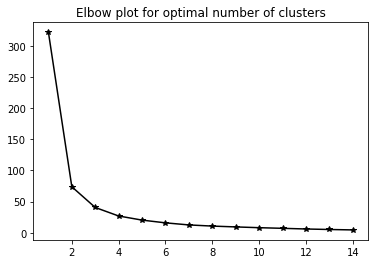

In [ ]:
#code6

print("we are back with KMeans")
#KMeans

clustered_fm = rfmTable_main[['Recency',"Frequency","Monetary"]].copy()
clustered_fm.head(5)

min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(clustered_fm)
data_scaled = pd.DataFrame(x_scaled)

data_scaled.head()

wscc = []
for i in range(1,15): 
    kmeans = KMeans(n_clusters=i, init="k-means++",random_state=0)
    kmeans.fit(data_scaled)
    wscc.append(kmeans.inertia_)  

plt.plot(range(1,15),wscc,marker="*",c="black")
plt.title("Elbow plot for optimal number of clusters")

matrix = x_scaled
for n_clusters in range(2,15):
    kmeans = KMeans(init='k-means++', n_clusters = n_clusters, n_init=30)
    kmeans.fit(matrix)
    clusters = kmeans.predict(matrix)
    silhouette_avg = silhouette_score(matrix, clusters)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

kmeans = KMeans(n_clusters = 6, init='k-means++', n_init =10,max_iter = 300)
kmeans.fit(data_scaled)
pred = kmeans.predict(data_scaled)

y_kmeans = kmeans.predict(data_scaled)

y_kmeans[:4]

# add cluster column to df1 here
df1_final["cluster"] = y_kmeans
# Count of Clusters
d_frame = pd.DataFrame(clustered_fm)
d_frame['cluster'] = y_kmeans
d_frame['cluster'].value_counts()

d_frame.head()

In [ ]:
#code7

print(sorted(d_frame["cluster"].unique()))

score = silhouette_score (data_scaled, kmeans.labels_)
print("Score = ", score)

print("Let's dance")

print(rfmTable_main.info())
print(rfmTable_main["Recency"].describe())
print(rfmTable_main["Frequency"].describe())
print(rfmTable_main["Monetary"].describe())

[0, 1, 2, 3, 4, 5]
Score =  0.5684202824454387
Let's dance
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4339 entries, 0 to 4338
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CustomerID  4339 non-null   float64
 1   Recency     4339 non-null   int64  
 2   Frequency   4339 non-null   int64  
 3   Monetary    4339 non-null   float64
 4   r_quartile  4339 non-null   int64  
 5   f_quartile  4339 non-null   int64  
 6   m_quartile  4339 non-null   int64  
 7   RFMScore    4339 non-null   object 
dtypes: float64(2), int64(5), object(1)
memory usage: 305.1+ KB
None
count    4339.000000
mean       91.518322
std       100.009747
min         0.000000
25%        17.000000
50%        50.000000
75%       141.000000
max       373.000000
Name: Recency, dtype: float64
count    4339.000000
mean        4.286932
std         7.801003
min         1.000000
25%         1.000000
50%         2.000000
75%         5.000000
max       2

In [ ]:
#code8

#segmentation based on rfm

def getRS(x):
  if x>141: return "Inactive"
  elif x<141 and x>=50: return "Temporarily idle"
  elif x<50 and x>=17: return "Frequent"
  else: return "Highly active"
  
def getFS(x):
  if x>=5: return "Stellar customer"
  elif x<5 and x>=2: return "Regulars"
  elif x<2 and x>=1: return "Returning customers"
  else: return "Potential"

def getMS(x):
  if x>=1627.625000: return "Best"
  elif x<1627.625000 and x>=659.680000: return "Top 50%"
  elif x<659.680000 and x>=303.455000: return "Top 75%"
  else: return "Worst"

rfmTable_main["Recencyscore"]=[getRS(i) for i in rfmTable_main["Recency"]]
rfmTable_main["Frequencyscore"]=[getFS(i) for i in rfmTable_main["Frequency"]]
rfmTable_main["Monetaryscore"]=[getMS(i) for i in rfmTable_main["Monetary"]]

In [ ]:
#code9

print(rfmTable_main.columns)
print(rfmTable_main[["Recencyscore","Frequencyscore","Monetaryscore"]].head(50))

#adding rfm score
rfmTable_main['RFM_Sum'] = rfmTable_main[['r_quartile','f_quartile','m_quartile']].sum(axis=1)
print(rfmTable_main.columns)
# rfmTable_main.head()

#adding rfm level
def rfm_level(df):
    if df['RFM_Sum'] >= 9:
        return 'Require Activation'
    elif ((df['RFM_Sum'] >= 8) and (df['RFM_Sum'] < 9)):
        return 'Needs Attention'
    elif ((df['RFM_Sum'] >= 7) and (df['RFM_Sum'] < 8)):
        return 'Promising'
    elif ((df['RFM_Sum'] >= 6) and (df['RFM_Sum'] < 7)):
        return 'Potential'
    elif ((df['RFM_Sum'] >= 5) and (df['RFM_Sum'] < 6)):
        return 'Loyal'
    elif ((df['RFM_Sum'] >= 4) and (df['RFM_Sum'] < 5)):
        return 'Champions'
    else:
        return 'Can\'t Loose Them'

# ['Can\'t Loose Them','Champions','Loyal','Potential','Promising','Needs Attention','Require Activation']
# Create a new variable RFM_Level
rfmTable_main['RFM_Level'] = rfmTable_main.apply(rfm_level, axis=1)
# Print the header with top 5 rows to the console
display(rfmTable_main)

Index(['CustomerID', 'Recency', 'Frequency', 'Monetary', 'r_quartile',
       'f_quartile', 'm_quartile', 'RFMScore', 'Recencyscore',
       'Frequencyscore', 'Monetaryscore'],
      dtype='object')
        Recencyscore       Frequencyscore Monetaryscore
0           Inactive  Returning customers         Worst
1      Highly active     Stellar customer          Best
2   Temporarily idle             Regulars          Best
3           Frequent  Returning customers          Best
4           Inactive  Returning customers       Top 75%
5           Frequent     Stellar customer          Best
6           Inactive  Returning customers         Worst
7           Inactive  Returning customers       Top 50%
8           Inactive  Returning customers       Top 75%
9           Frequent             Regulars          Best
10          Frequent  Returning customers          Best
11     Highly active             Regulars       Top 50%
12  Temporarily idle             Regulars          Best
13  Temporarily i

,CustomerID,Recency,Frequency,Monetary,r_quartile,f_quartile,m_quartile,RFMScore,Recencyscore,Frequencyscore,Monetaryscore,RFM_Sum,RFM_Level
0,12346.0,325,1,0.00,4,4,4,444,Inactive,Returning customers,Worst,12,Require Activation
1,12347.0,1,7,4310.00,1,1,1,111,Highly active,Stellar customer,Best,3,Can't Loose Them
2,12348.0,74,4,1797.24,3,2,1,321,Temporarily idle,Regulars,Best,6,Potential
3,12349.0,18,1,1757.55,2,4,1,241,Frequent,Returning customers,Best,7,Promising
4,12350.0,309,1,334.40,4,4,3,443,Inactive,Returning customers,Top 75%,11,Require Activation
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4334,18280.0,277,1,180.60,4,4,4,444,Inactive,Returning customers,Worst,12,Require Activation
4335,18281.0,180,1,80.82,4,4,4,444,Inactive,Returning customers,Worst,12,Require Activation
4336,18282.0,7,2,176.60,1,3,4,134,Highly active,Regulars,Worst,8,Needs Attention
4337,18283.0,3,16,2094.88,1,1,1,111,Highly active,Stellar customer,Best,3,Can't Loose Them


In [ ]:
#code10

print(df1_final.info())
display(df1_final)

print(rfmTable_main.info())
display(rfmTable_main)

#merging df1_final and rfmTable_main
result = df1_final.merge(rfmTable_main, sort=False)

print(df1_final["CustomerID"].describe())
display(result)

#csv formatting

result.to_csv("df_final.csv", index=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4339 entries, 0 to 4338
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerID        4339 non-null   float64
 1   categ_0           4339 non-null   float64
 2   categ_1           4339 non-null   float64
 3   categ_2           4339 non-null   float64
 4   categ_3           4339 non-null   float64
 5   categ_4           4339 non-null   float64
 6   Quantity          4339 non-null   int64  
 7   Country           4339 non-null   object 
 8   QuantityCanceled  4339 non-null   int64  
 9   TotalPrice        4339 non-null   float64
 10  CancellationRate  4339 non-null   float64
 11  cluster           4339 non-null   int32  
dtypes: float64(8), int32(1), int64(2), object(1)
memory usage: 423.7+ KB
None


,CustomerID,categ_0,categ_1,categ_2,categ_3,categ_4,Quantity,Country,QuantityCanceled,TotalPrice,CancellationRate,cluster
0,12346.0,0.00,0.00,0.00,0.00,0.00,74215,United Kingdom,74215,0.00,1.000000,1
1,12347.0,518.99,484.32,896.70,1136.80,1273.19,2458,Iceland,0,4310.00,0.000000,2
2,12348.0,360.00,683.24,0.00,754.00,0.00,2341,Finland,0,1797.24,0.000000,0
3,12349.0,808.85,79.32,215.22,465.86,188.30,631,Italy,0,1757.55,0.000000,2
4,12350.0,40.00,39.10,93.30,162.00,0.00,197,Norway,0,334.40,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4334,18280.0,61.45,0.00,74.30,0.00,44.85,45,United Kingdom,0,180.60,0.000000,4
4335,18281.0,33.90,15.12,15.30,16.50,0.00,54,United Kingdom,0,80.82,0.000000,3
4336,18282.0,51.00,24.15,35.40,22.95,43.10,103,United Kingdom,5,176.60,0.048544,2
4337,18283.0,60.75,346.64,866.21,706.43,114.85,1397,United Kingdom,0,2094.88,0.000000,2


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4339 entries, 0 to 4338
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CustomerID      4339 non-null   float64
 1   Recency         4339 non-null   int64  
 2   Frequency       4339 non-null   int64  
 3   Monetary        4339 non-null   float64
 4   r_quartile      4339 non-null   int64  
 5   f_quartile      4339 non-null   int64  
 6   m_quartile      4339 non-null   int64  
 7   RFMScore        4339 non-null   object 
 8   Recencyscore    4339 non-null   object 
 9   Frequencyscore  4339 non-null   object 
 10  Monetaryscore   4339 non-null   object 
 11  RFM_Sum         4339 non-null   int64  
 12  RFM_Level       4339 non-null   object 
dtypes: float64(2), int64(6), object(5)
memory usage: 474.6+ KB
None


,CustomerID,Recency,Frequency,Monetary,r_quartile,f_quartile,m_quartile,RFMScore,Recencyscore,Frequencyscore,Monetaryscore,RFM_Sum,RFM_Level
0,12346.0,325,1,0.00,4,4,4,444,Inactive,Returning customers,Worst,12,Require Activation
1,12347.0,1,7,4310.00,1,1,1,111,Highly active,Stellar customer,Best,3,Can't Loose Them
2,12348.0,74,4,1797.24,3,2,1,321,Temporarily idle,Regulars,Best,6,Potential
3,12349.0,18,1,1757.55,2,4,1,241,Frequent,Returning customers,Best,7,Promising
4,12350.0,309,1,334.40,4,4,3,443,Inactive,Returning customers,Top 75%,11,Require Activation
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4334,18280.0,277,1,180.60,4,4,4,444,Inactive,Returning customers,Worst,12,Require Activation
4335,18281.0,180,1,80.82,4,4,4,444,Inactive,Returning customers,Worst,12,Require Activation
4336,18282.0,7,2,176.60,1,3,4,134,Highly active,Regulars,Worst,8,Needs Attention
4337,18283.0,3,16,2094.88,1,1,1,111,Highly active,Stellar customer,Best,3,Can't Loose Them


count     4339.000000
mean     15299.936852
std       1721.889758
min      12346.000000
25%      13812.500000
50%      15299.000000
75%      16778.500000
max      18287.000000
Name: CustomerID, dtype: float64


,CustomerID,categ_0,categ_1,categ_2,categ_3,categ_4,Quantity,Country,QuantityCanceled,TotalPrice,CancellationRate,cluster,Recency,Frequency,Monetary,r_quartile,f_quartile,m_quartile,RFMScore,Recencyscore,Frequencyscore,Monetaryscore,RFM_Sum,RFM_Level
0,12346.0,0.00,0.00,0.00,0.00,0.00,74215,United Kingdom,74215,0.00,1.000000,1,325,1,0.00,4,4,4,444,Inactive,Returning customers,Worst,12,Require Activation
1,12347.0,518.99,484.32,896.70,1136.80,1273.19,2458,Iceland,0,4310.00,0.000000,2,1,7,4310.00,1,1,1,111,Highly active,Stellar customer,Best,3,Can't Loose Them
2,12348.0,360.00,683.24,0.00,754.00,0.00,2341,Finland,0,1797.24,0.000000,0,74,4,1797.24,3,2,1,321,Temporarily idle,Regulars,Best,6,Potential
3,12349.0,808.85,79.32,215.22,465.86,188.30,631,Italy,0,1757.55,0.000000,2,18,1,1757.55,2,4,1,241,Frequent,Returning customers,Best,7,Promising
4,12350.0,40.00,39.10,93.30,162.00,0.00,197,Norway,0,334.40,0.000000,1,309,1,334.40,4,4,3,443,Inactive,Returning customers,Top 75%,11,Require Activation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4334,18280.0,61.45,0.00,74.30,0.00,44.85,45,United Kingdom,0,180.60,0.000000,4,277,1,180.60,4,4,4,444,Inactive,Returning customers,Worst,12,Require Activation
4335,18281.0,33.90,15.12,15.30,16.50,0.00,54,United Kingdom,0,80.82,0.000000,3,180,1,80.82,4,4,4,444,Inactive,Returning customers,Worst,12,Require Activation
4336,18282.0,51.00,24.15,35.40,22.95,43.10,103,United Kingdom,5,176.60,0.048544,2,7,2,176.60,1,3,4,134,Highly active,Regulars,Worst,8,Needs Attention
4337,18283.0,60.75,346.64,866.21,706.43,114.85,1397,United Kingdom,0,2094.88,0.000000,2,3,16,2094.88,1,1,1,111,Highly active,Stellar customer,Best,3,Can't Loose Them
